In [227]:
import openai
import dotenv
import glob
import os

In [228]:
# load environment variables from `.env` file if it exists
# recursively searches for `.env` in all folders starting from work dir
dotenv.load_dotenv(override=True)
openai.api_key = os.getenv("OPENAI_API_KEY")

In [235]:
num_docs = 20
num_tokens_per_doc = 1000
num_tokens_in_query = 20
engine = "curie"
max_rerank = 10

In [236]:
docs = [
    "a" * 4 * num_tokens_per_doc
] * num_docs

query = "a" * 4 * num_tokens_in_query

In [237]:
# docs

In [238]:
# query

In [239]:
response = openai.Engine(engine).search(
    documents=docs, 
    query=query,
    max_rerank=max_rerank,
    return_metadata=True
)

In [240]:
len(response["data"])

20

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

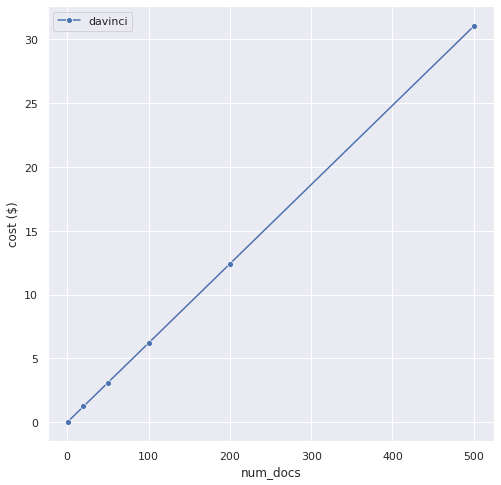

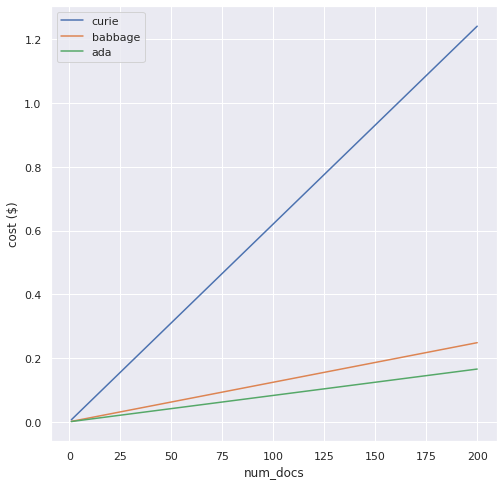

In [215]:
costs_y = [0.62244, ]
num_docs_x = [10, ]

#create dataframe using two list days and temperature
davinci = pd.DataFrame({"num_docs":[1, 20, 50, 100, 200, 500], "cost ($)":[0.06408, 1.24284, 3.10404, 6.20604, 12.41004, 31.022039999999997]})
curie = pd.DataFrame({"num_docs":[1, 20, 50, 100, 200], "cost ($)":[0.0064080000000000005, 0.12428399999999999, 0.310404, 0.620604, 1.241004]})
babbage = pd.DataFrame({"num_docs":[1, 20, 50, 100, 200], "cost ($)":[0.0012816, 0.024856799999999995, 0.0620808, 0.12412079999999999, 0.24820079999999997]})
ada = pd.DataFrame({"num_docs":[1, 20, 50, 100, 200], "cost ($)":[0.0008544000000000001, 0.0165712, 0.041387200000000006, 0.0827472, 0.1654672]})

# Draw line plot
sns.set_theme()
sns.set(rc={"figure.figsize":(8, 8)}) #width=3, #height=4

sns.lineplot(x="num_docs", y="cost ($)", data=davinci, label="davinci", marker="o")
plt.show() # to show graph

# show others
sns.lineplot(x="num_docs", y="cost ($)", data=curie, label="curie")
sns.lineplot(x="num_docs", y="cost ($)", data=babbage, label="babbage")
sns.lineplot(x="num_docs", y="cost ($)", data=ada, label="ada")
plt.show()

### Total tokens = Number of tokens in all of your documents + (Number of documents + 1) * 14 + (Number of documents + 1) * Number of tokens in your query

In [190]:
def calculate_price(num_docs, num_tokens_per_doc, num_tokens_in_query, engine):
    tokens = 0
    tokens += num_docs*num_tokens_per_doc
    tokens += (num_docs+1)*14
    tokens += (num_docs+1)*num_tokens_in_query
    
    davinci_price = 0.0600
    curie_price = 0.0060
    babbage_price = 0.0012
    ada_price = 0.0008

    if engine == "davinci":
        price = davinci_price
    elif engine == "curie":
        price = curie_price
    elif engine == "babbage":
        price = babbage_price
    elif engine == "ada":
        price = ada_price

    cost = tokens / 1000 * price

    return tokens, cost

In [211]:
max_rerank = None

number_of_docs = [1, 20, 50, 100, 200, 500]
costs = []

for x in number_of_docs:
    tokens, cost = calculate_price(num_docs=x, num_tokens_per_doc=1000, num_tokens_in_query=20, engine="davinci") 
    costs.append(cost)
print(number_of_docs)
print(costs)

[1, 20, 50, 100, 200, 500]
[0.06408, 1.24284, 3.10404, 6.20604, 12.41004, 31.022039999999997]


In [212]:
number_of_docs = [1, 20, 50, 100, 200, 500]
costs = []

for x in number_of_docs:
    tokens, cost = calculate_price(num_docs=x, num_tokens_per_doc=1000, num_tokens_in_query=20, engine="curie") 
    costs.append(cost)
print(number_of_docs)
print(costs)

[1, 20, 50, 100, 200, 500]
[0.0064080000000000005, 0.12428399999999999, 0.310404, 0.620604, 1.241004, 3.102204]


In [213]:
number_of_docs = [1, 20, 50, 100, 200, 500]
costs = []

for x in number_of_docs:
    tokens, cost = calculate_price(num_docs=x, num_tokens_per_doc=1000, num_tokens_in_query=20, engine="babbage") 
    costs.append(cost)
print(number_of_docs)
print(costs)

[1, 20, 50, 100, 200, 500]
[0.0012816, 0.024856799999999995, 0.0620808, 0.12412079999999999, 0.24820079999999997, 0.6204407999999999]


In [217]:
number_of_docs = [1, 20, 50, 100, 200, 500]
costs = []

for x in number_of_docs:
    tokens, cost = calculate_price(num_docs=x, num_tokens_per_doc=1000, num_tokens_in_query=20, engine="ada") 
    costs.append(cost)
print(number_of_docs)
print(costs)

[1, 20, 50, 100, 200, 500]
[0.0008544000000000001, 0.0165712, 0.041387200000000006, 0.0827472, 0.1654672, 0.41362720000000003]


In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

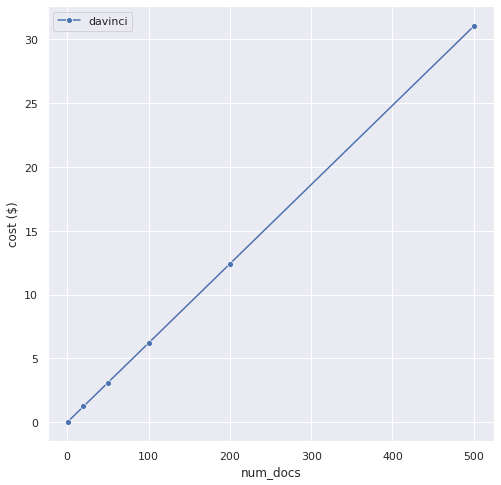

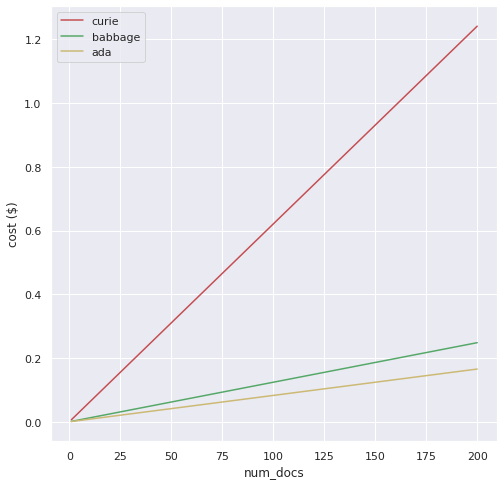

In [225]:
davinci = pd.DataFrame({"num_docs":[1, 20, 50, 100, 200, 500], "cost ($)":[0.06408, 1.24284, 3.10404, 6.20604, 12.41004, 31.022039999999997]})
curie = pd.DataFrame({"num_docs":[1, 20, 50, 100, 200], "cost ($)":[0.0064080000000000005, 0.12428399999999999, 0.310404, 0.620604, 1.241004]})
babbage = pd.DataFrame({"num_docs":[1, 20, 50, 100, 200], "cost ($)":[0.0012816, 0.024856799999999995, 0.0620808, 0.12412079999999999, 0.24820079999999997]})
ada = pd.DataFrame({"num_docs":[1, 20, 50, 100, 200], "cost ($)":[0.0008544000000000001, 0.0165712, 0.041387200000000006, 0.0827472, 0.1654672]})

# Draw line plot
sns.set_theme()
sns.set(rc={"figure.figsize":(8, 8)}) #width=3, #height=4

sns.lineplot(x="num_docs", y="cost ($)", data=davinci, label="davinci", marker="o")
plt.show() # to show graph

# show others
sns.lineplot(x="num_docs", y="cost ($)", data=curie, label="curie", color='r')
sns.lineplot(x="num_docs", y="cost ($)", data=babbage, label="babbage", color='g')
sns.lineplot(x="num_docs", y="cost ($)", data=ada, label="ada", color='y')
plt.show()